<a href="https://colab.research.google.com/github/Rashmitakhatiwada/vctest/blob/master/Data_Science_Project(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Predict the onset of diabetes based on diagnostic measures:
  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Use ML algorithm to classify diabetes.

Plot and display necessary metrics.

Use EDA for feature selection and do necessary feature engineering and modeling and evaluation parts with explanation.

In [7]:
!git clone https://github.com/Rashmitakhatiwada/vctest.git

Cloning into 'vctest'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), 1.75 KiB | 896.00 KiB/s, done.


# Importing all th dataframes required for the project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Transfering the data from  Diabetes Database.zip to new dataframe df.

In [ ]:
df=pd.read_csv('/content/Diabetes Database.zip')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape # (rows, columns) of dataframe

(768, 9)

# Detecting Missing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# check how many missing rows in each columns
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Plotting and displaying data.

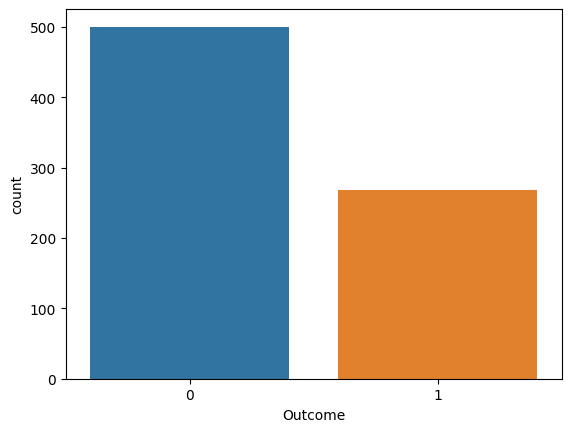

In [ ]:
sns.countplot(x='Outcome',data=df)
plt.show()

# EDA

In [ ]:
# list all column names in dataframe
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Out of 786 people, we have 2 unique class and first class i.e people not having a diabetes are  500 people and second class i.e people suffering from diabetes are 268 people.

In [ ]:
df['Outcome'].value_counts()/len(df) * 100 #Converting the data into percentage.

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

# Analyzing the above data
0 class has 65% data and 1 class has 34% data.

we can see that the given dataset is not a balaned data set.

- Accuracy is not a good metric to evaluate model fitted with imbalanced data.

To make data balanced we have several technique:
* Oversampling of a class having low percentage/count(minority class)
* Undersampling of a class having high percentage/count(majority class)

This technique can be done using SMOTE.

In [ ]:
import plotly.express as px
fig = px.pie(names = df['Outcome'].value_counts().index, values = df['Outcome'].value_counts().values)
fig.update_layout(width = 400, height = 300)

# Is there any relationship between Pregnancies and Outcome?

<Axes: xlabel='Outcome', ylabel='count'>

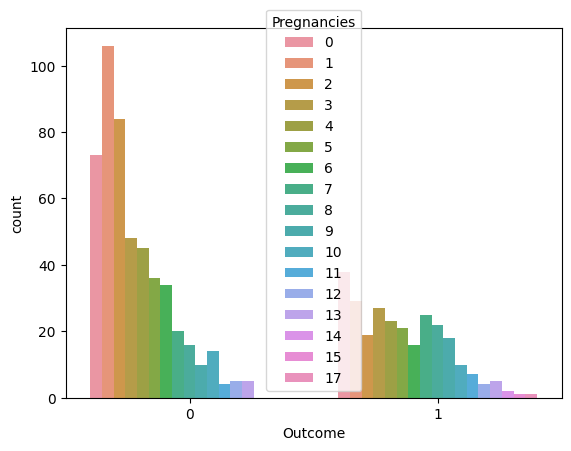

In [ ]:
sns.countplot(x = 'Outcome', hue = 'Pregnancies', data = df)



Most of the men died and most of the female survived. There is relationship between them. Therefore, Sex might be good predictor variable on this data.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

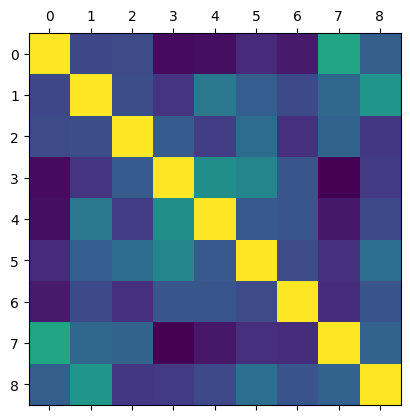

In [ ]:
plt.matshow(df.corr())
plt.show()

In [ ]:
# Is there any relationship between pregnancies and glucose?

# Is there any relationship between Pregnancies and Outcomes?

<Axes: xlabel='Pregnancies', ylabel='count'>

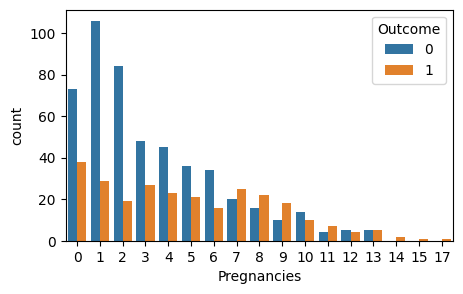

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))
sns.countplot(x='Pregnancies', hue='Outcome', data = df)

# Explain

# Is there any relationship between Glucose and Outcome?

<Axes: xlabel='Glucose', ylabel='count'>

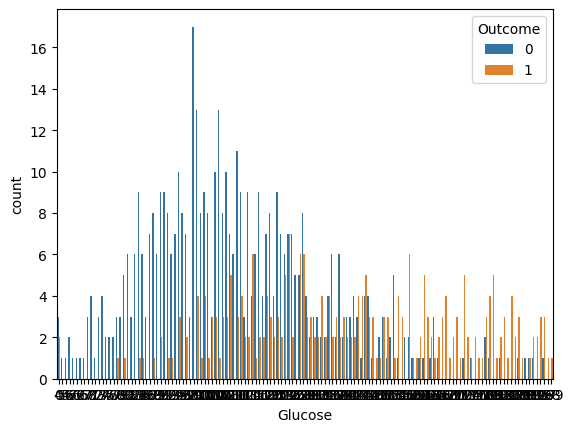

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(x='Glucose', hue='Outcome', data = df)

# Explain
more Glucose = Outcome 1
  
Less glucose = outcome  0

# Is there any relationship between glucose and insulin?

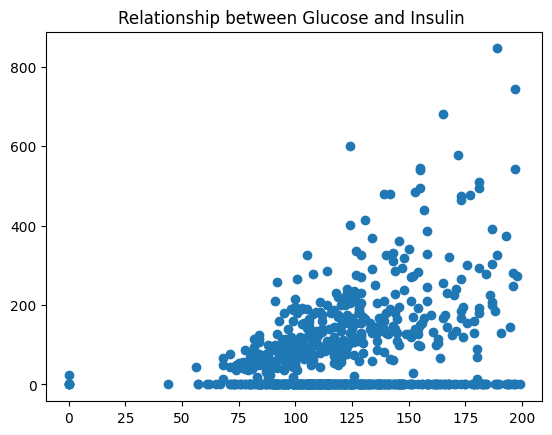

In [ ]:
plt.scatter(x=df['Glucose'],y=df['Insulin'])
plt.title("Relationship between Glucose and Insulin ")
plt.show()

# Age and bmi

In [ ]:
df.groupby('Outcome').Age.median()

Outcome
0    27.0
1    36.0
Name: Age, dtype: float64

In [ ]:
df.groupby('Outcome').Age.mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

<Axes: xlabel='Outcome', ylabel='Age'>

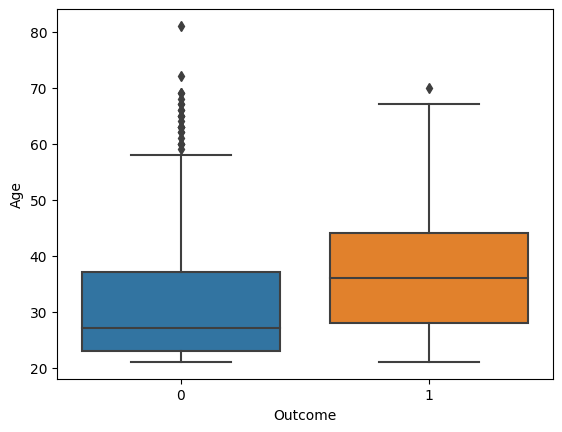

In [ ]:
sns.boxplot(data = df, x='Outcome', y = 'Age')

# Age and BMI

<Axes: xlabel='Age', ylabel='Count'>

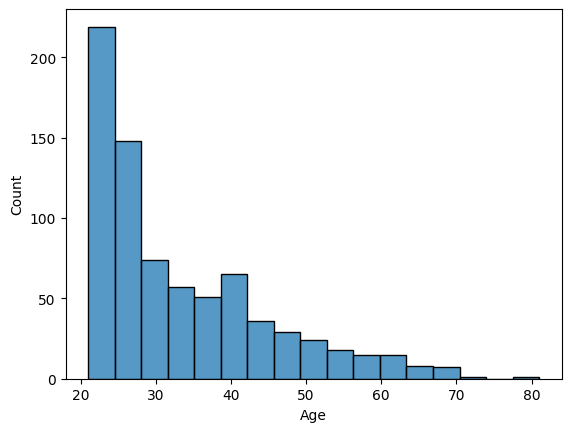

In [ ]:
sns.histplot(df.Age)

<Axes: xlabel='BMI', ylabel='Count'>

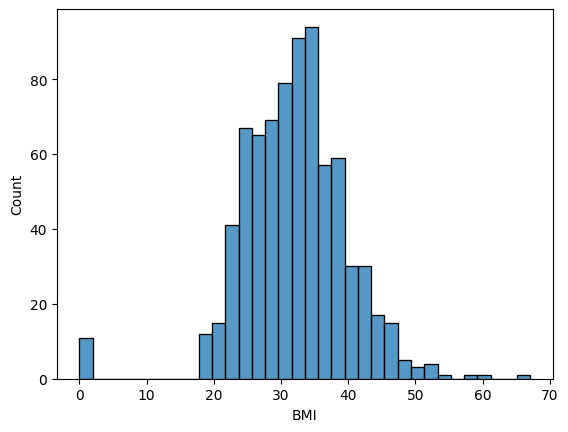

In [ ]:
sns.histplot(df.BMI)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Modeling

In [ ]:
X=df.iloc[:, :-1] #Independent variable
y=df['Outcome'] # dependent variable

In [ ]:
X,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35      0.0  33.6   
 1              1       85             66             29      0.0  26.6   
 2              8      183             64              0      0.0  23.3   
 3              1       89             66             23     94.0  28.1   
 4              0      137             40             35    168.0  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48    180.0  32.9   
 764            2      122             70             27      0.0  36.8   
 765            5      121             72             23    112.0  26.2   
 766            1      126             60              0      0.0  30.1   
 767            1       93             70             31      0.0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 40)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             classification_report,
                             confusion_matrix)

In [ ]:
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print(f"Accuracy: {accuracy}")

f1_score = f1_score(y_true = y_test, y_pred = y_pred)
print(f"f1_score: {f1_score}")

precision = precision_score(y_true = y_test, y_pred = y_pred)
print(f"precision_score: {precision}")

recall = recall_score(y_true = y_test, y_pred = y_pred, average = 'macro')
print(f"recall_score: {recall}")

Accuracy: 0.7402597402597403
f1_score: 0.6103896103896104
precision_score: 0.7230769230769231
recall_score: 0.7006646621300838


In [ ]:
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       142
           1       0.72      0.53      0.61        89

    accuracy                           0.74       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.74      0.74      0.73       231



In [ ]:
confusion_matrix(y_true = y_test, y_pred = y_pred)

array([[124,  18],
       [ 42,  47]])

In [ ]:
model.classes_

array([0, 1])

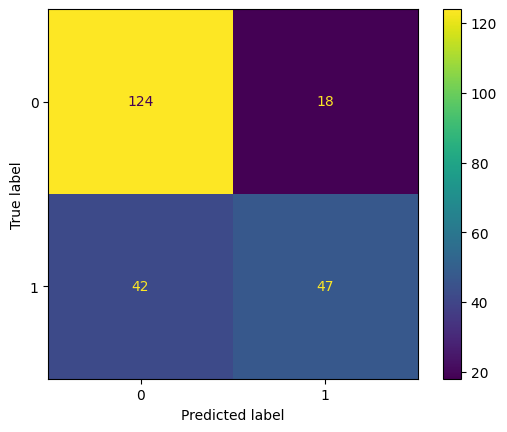

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()